In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

/tmp/ipykernel_157/2071291342.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{tick:.2f}" for tick in r_ticks], fontsize=10)


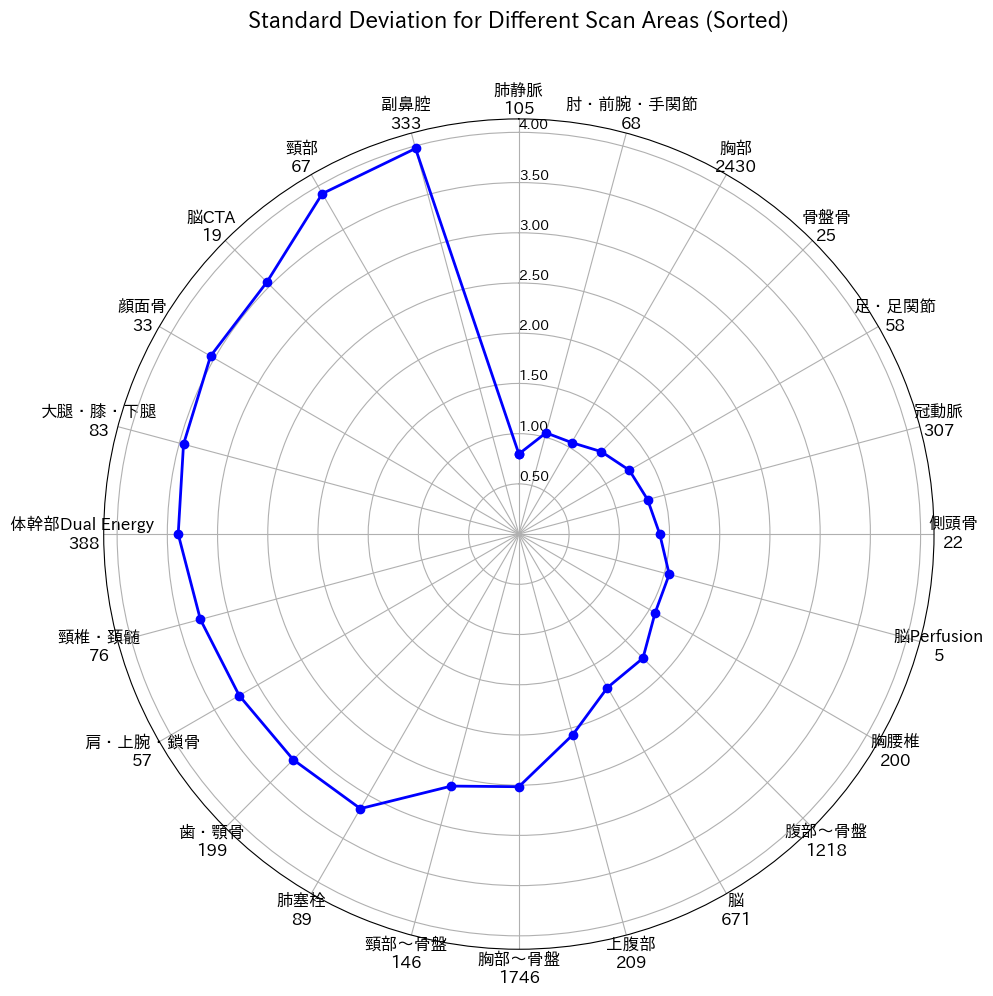

In [38]:
# Combined code for loading the data and creating the radar chart

# Load the data
data = pd.read_excel("predict_statistic.xlsx")

# Sort the data by 'std' in ascending order
sorted_data = data.sort_values(by="std", ascending=True)

# Extract the required data after sorting
sorted_labels = sorted_data["scan_area"].tolist()
sorted_labels = [label if '脳CTA' == label else label.replace('CT', '') for label in sorted_labels]
sorted_values = sorted_data["std"].tolist()

# Define the angles based on the sorted data length
num_vars_sorted = len(sorted_labels)
sorted_angles = np.linspace(0, 2 * np.pi, num_vars_sorted, endpoint=False).tolist()

# The radar chart is a closed polygon, so we need to "complete the loop" by appending the start value to the end.
sorted_values += sorted_values[:1]
sorted_angles += sorted_angles[:1]
sorted_labels += sorted_labels[:1]

# Extract count values for each scan_area
count_values = sorted_data["count"].tolist()

# Create the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.plot(sorted_angles, sorted_values, color='blue', linewidth=2, marker='o')
ax.set_xticks(sorted_angles[:-1])
ax.set_xticklabels([f"{label}\n{int(count)}" for label, count in zip(sorted_labels[:-1], count_values)], fontsize=12)

# Set y-tick labels to display the radius values at the 12 o'clock position
ax.set_rlabel_position(0)
r_ticks = ax.get_yticks()
ax.set_yticklabels([f"{tick:.2f}" for tick in r_ticks], fontsize=10)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Set a title for the chart
ax.set_title("Standard Deviation for Different Scan Areas (Sorted)", y=1.1, fontsize=16)

plt.tight_layout()
plt.show()
#


In [6]:
output_file_path = "radar_chart.png"
fig.savefig(output_file_path, dpi=300, bbox_inches='tight')

output_file_path

'radar_chart.png'